In [1]:
%matplotlib qt

In [2]:

import mne
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()

fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(fname)

# Set up pick list: MEG + STI 014 - bad channels
want_meg = True
want_eeg = False
want_stim = False
include = ['STI 014']
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bad channels + 2 more

picks = mne.pick_types(raw.info, meg=want_meg, eeg=want_eeg, stim=want_stim,
                       include=include, exclude='bads')

some_picks = picks[:5]  # take 5 first
start, stop = raw.time_as_index([0, 15])  # read the first 15s of data
data, times = raw[some_picks, start:(stop + 1)]

# save 150s of MEG data in FIF file
raw.save('sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks,
         overwrite=True)

Automatically created module for IPython interactive environment
Opening raw data file C:\Users\jz\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Overwriting existing file.
Writing E:\space\bci\bci_mne_practice\read_and_write\sample_audvis_meg_raw.fif
Closing E:\space\bci\bci_mne_practice\read_and_write\sample_audvis_meg_raw.fif [done]


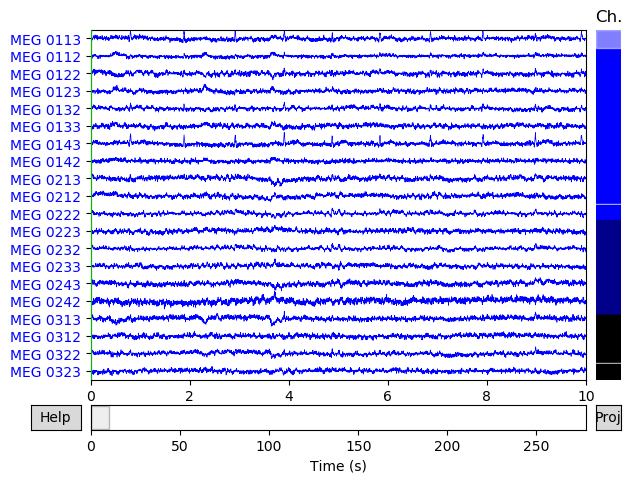

In [3]:
raw.plot()